In [8]:
import plotly.graph_objects as go
import urllib, json
import pandas as pd

In [4]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

In [7]:
from pySankey.sankey import sankey

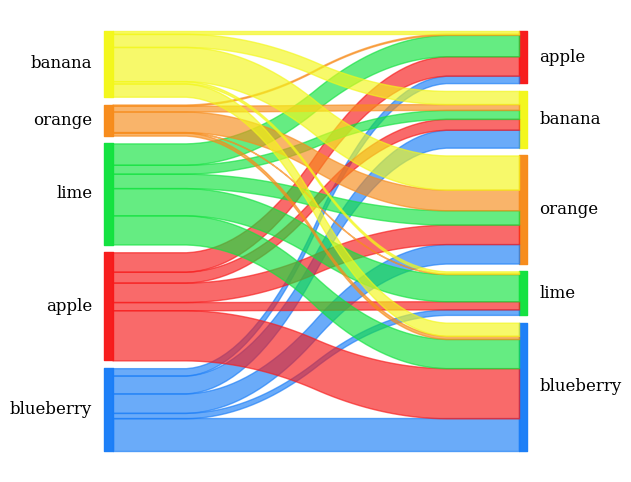

In [9]:
url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/fruits.txt"
df = pd.read_csv(url, sep=" ", names=["true", "predicted"])

colors = {
    "apple": "#f71b1b",
    "blueberry": "#1b7ef7",
    "banana": "#f3f71b",
    "lime": "#12e23f",
    "orange": "#f78c1b"
}

sankey(df["true"], df["predicted"], aspect=20, colorDict=colors, fontsize=12)

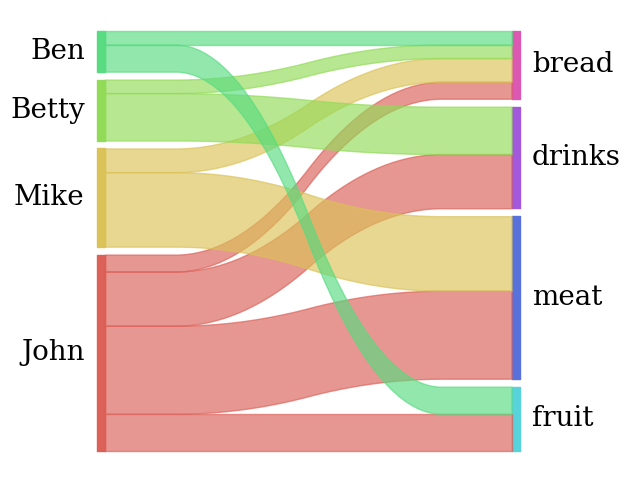

In [10]:
url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/customers-goods.csv"
df = pd.read_csv(url, sep=",")

sankey(
    left=df["customer"], right=df["good"], 
    leftWeight= df["revenue"], rightWeight=df["revenue"], 
    aspect=20, fontsize=20
)

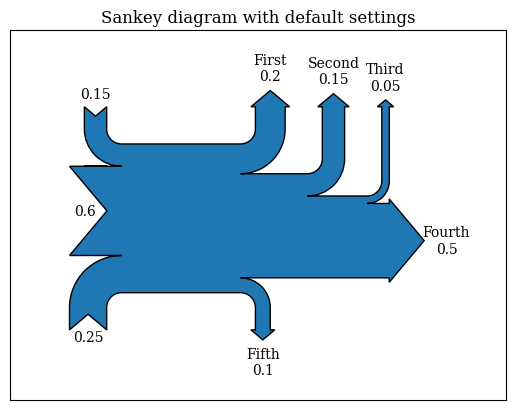

In [12]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
# basic sankey chart
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], 
orientations=[-1, 1, 0, 1, 1, 1, 0,-1]).finish()
plt.title("Sankey diagram with default settings")
plt.show()